In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [2]:
if not os.path.exists('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'):
    !wget 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

df.isnull().sum()

df.dropna(inplace=True)

df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [7]:
df.churn = (df.churn == 'yes').astype(int)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
len(df_train), len(df_val), len(df_test)

(4218, 1407, 1407)

In [11]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [12]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3457,8566-yprgl,female,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,mailed_check,19.50,19.50,0
612,2804-etqdk,male,0,no,yes,66,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.55,1357.10,0
589,0795-lafgp,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,electronic_check,90.40,6668.05,0
2685,5781-bkhop,female,0,yes,no,72,yes,yes,fiber_optic,yes,...,yes,no,yes,no,two_year,no,bank_transfer_(automatic),100.65,7334.05,0
1549,4237-rlaqd,male,0,no,no,1,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,45.85,45.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0297-rbcsg,male,0,no,no,19,yes,no,dsl,no,...,no,yes,no,yes,one_year,yes,bank_transfer_(automatic),65.35,1231.85,0
5200,6050-ijrhs,female,0,yes,yes,70,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,electronic_check,106.50,7397.00,0
3987,7625-xcqrh,female,0,no,no,11,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,76.50,837.95,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [13]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
df_full_train = df_full_train.reset_index(drop=True)

In [15]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.7328
1    0.2672
Name: proportion, dtype: float64

In [16]:
df_full_train.churn.mean()

np.float64(0.2672)

In [17]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [18]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [19]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [20]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [21]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
round(churn_female, 2), round(churn_male, 2)

(np.float64(0.27), np.float64(0.26))

In [22]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
round(churn_partner, 2), round(churn_no_partner, 2)

(np.float64(0.2), np.float64(0.33))

In [23]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group


,mean,count,diff,risk
gender,,,,
female,0.271716,2786,0.004516,1.016900
male,0.262769,2839,-0.004431,0.983415


,mean,count,diff,risk
seniorcitizen,,,,
0,0.236182,4704,-0.031018,0.883915
1,0.425624,921,0.158424,1.592905


,mean,count,diff,risk
partner,,,,
no,0.330482,2923,0.063282,1.236835
yes,0.198742,2702,-0.068458,0.743794


,mean,count,diff,risk
dependents,,,,
no,0.313989,3946,0.046789,1.175108
yes,0.157236,1679,-0.109964,0.588460


,mean,count,diff,risk
phoneservice,,,,
no,0.257519,532,-0.009681,0.963768
yes,0.268211,5093,0.001011,1.003785


,mean,count,diff,risk
multiplelines,,,,
no,0.251210,2687,-0.015990,0.940155
no_phone_service,0.257519,532,-0.009681,0.963768
yes,0.287199,2406,0.019999,1.074845


,mean,count,diff,risk
internetservice,,,,
dsl,0.194215,1936,-0.072985,0.726852
fiber_optic,0.418848,2483,0.151648,1.567546
no,0.072139,1206,-0.195061,0.269982


,mean,count,diff,risk
onlinesecurity,,,,
no,0.417586,2809,0.150386,1.562823
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.150932,1610,-0.116268,0.564864


,mean,count,diff,risk
onlinebackup,,,,
no,0.398703,2468,0.131503,1.492153
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.221425,1951,-0.045775,0.828686


,mean,count,diff,risk
deviceprotection,,,,
no,0.390145,2476,0.122945,1.460125
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.231601,1943,-0.035599,0.866769


,mean,count,diff,risk
techsupport,,,,
no,0.418934,2757,0.151734,1.567865
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.157040,1662,-0.110160,0.587723


,mean,count,diff,risk
streamingtv,,,,
no,0.336908,2238,0.069708,1.260883
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.303530,2181,0.036330,1.135967


,mean,count,diff,risk
streamingmovies,,,,
no,0.332297,2251,0.065097,1.243626
no_internet_service,0.072139,1206,-0.195061,0.269982
yes,0.308118,2168,0.040918,1.153137


,mean,count,diff,risk
contract,,,,
month-to-month,0.428155,3090,0.160955,1.602378
one_year,0.119088,1184,-0.148112,0.445688
two_year,0.028868,1351,-0.238332,0.108037


,mean,count,diff,risk
paperlessbilling,,,,
no,0.166376,2296,-0.100824,0.622666
yes,0.336738,3329,0.069538,1.260246


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.165282,1204,-0.101918,0.618572
credit_card_(automatic),0.163097,1214,-0.104103,0.610394
electronic_check,0.456131,1892,0.188931,1.707077
mailed_check,0.184791,1315,-0.082409,0.691583


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.165282,1204,-0.101918,0.618572
credit_card_(automatic),0.163097,1214,-0.104103,0.610394
electronic_check,0.456131,1892,0.188931,1.707077
mailed_check,0.184791,1315,-0.082409,0.691583


In [24]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.09711425631309603)

In [25]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

np.float64(5.109809050674041e-05)

In [26]:
def mutual_info_churn(series):
    return mutual_info_score(series, df_full_train.churn)

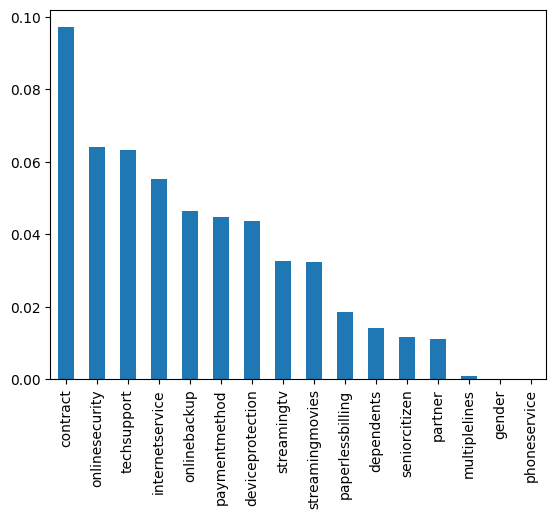

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [27]:
mi = df_full_train[categorical].apply(mutual_info_churn)
mi = mi.sort_values(ascending=False)
mi.index

mi.plot.bar()
plt.show()

df_full_train.columns



In [28]:
df_full_train[numerical].corrwith(df_full_train.churn).to_frame('correlation')

,correlation
tenure,-0.350139
monthlycharges,0.194926
totalcharges,-0.197277


In [29]:
df_full_train.groupby(by='churn')[numerical].mean()


,tenure,monthlycharges,totalcharges
churn,,,
0,37.467492,61.429148,2562.653421
1,18.037259,74.707751,1545.545975


In [30]:
from sklearn.feature_extraction import DictVectorizer


In [31]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')


In [32]:
train_dict[0]


{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'month-to-month',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 18,
 'monthlycharges': 20.45,
 'totalcharges': 357.0}

In [33]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [34]:
X_train = dv.transform(train_dict)


In [35]:
X_train.shape


(4218, 45)

In [36]:
dv.get_feature_names_out()



array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [39]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [40]:
model.predict_proba(X_val)

array([[0.95697201, 0.04302799],
       [0.64643703, 0.35356297],
       [0.95235075, 0.04764925],
       ...,
       [0.27817969, 0.72182031],
       [0.45521397, 0.54478603],
       [0.92929418, 0.07070582]])

In [41]:
y_pred = model.predict_proba(X_val)[:, 1]

In [42]:
y_pred

array([0.04302799, 0.35356297, 0.04764925, ..., 0.72182031, 0.54478603,
       0.07070582])

In [47]:
churn = (y_pred > 0.5).astype(int)

In [48]:
(y_val == churn).mean()

np.float64(0.8116560056858564)

In [50]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn
df_pred['actual'] = y_val
df_pred.head()



,probability,prediction,actual
0,0.043028,0,0
1,0.353563,0,1
2,0.047649,0,1
3,0.040227,0,0
4,0.089584,0,0


In [54]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred.head(10)



,probability,prediction,actual,correct
0,0.043028,0,0,True
1,0.353563,0,1,False
2,0.047649,0,1,False
3,0.040227,0,0,True
4,0.089584,0,0,True
5,0.129527,0,0,True
6,0.220689,0,0,True
7,0.475378,0,1,False
8,0.485728,0,0,True
9,0.440773,0,1,False


In [53]:
df_pred.correct.mean()

np.float64(0.8116560056858564)

In [55]:
zip(dv.get_feature_names_out(), model.coef_[0].round(3))

In [56]:
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')


[{'contract': 'month-to-month', 'tenure': 18, 'monthlycharges': 20.45},
 {'contract': 'two_year', 'tenure': 5, 'monthlycharges': 20.45},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 60.15},
 {'contract': 'two_year', 'tenure': 53, 'monthlycharges': 19.85},
 {'contract': 'month-to-month', 'tenure': 23, 'monthlycharges': 74.95},
 {'contract': 'two_year', 'tenure': 39, 'monthlycharges': 49.8},
 {'contract': 'month-to-month', 'tenure': 63, 'monthlycharges': 89.6},
 {'contract': 'one_year', 'tenure': 16, 'monthlycharges': 79.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 69.2},
 {'contract': 'month-to-month', 'tenure': 26, 'monthlycharges': 92.4}]

In [57]:
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

In [58]:
dv_small = DictVectorizer(sparse=False)

In [59]:
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [60]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [61]:
X_train_small = dv_small.transform(dict_train_small)

In [62]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_train_small, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [63]:
w0 =model_small.intercept_[0]

np.float64(-1.9029660110903994)

In [65]:
w = model_small.coef_[0]
w.round(3)

array([ 0.353, -0.646, -1.61 ,  0.029, -0.037])

In [66]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.353),
 'contract=one_year': np.float64(-0.646),
 'contract=two_year': np.float64(-1.61),
 'monthlycharges': np.float64(0.029),
 'tenure': np.float64(-0.037)}

In [67]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8566-yprgl,female,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,mailed_check,19.50,19.50,0
1,2804-etqdk,male,0,no,yes,66,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.55,1357.10,0
2,0795-lafgp,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,electronic_check,90.40,6668.05,0
3,5781-bkhop,female,0,yes,no,72,yes,yes,fiber_optic,yes,...,yes,no,yes,no,two_year,no,bank_transfer_(automatic),100.65,7334.05,0
4,4237-rlaqd,male,0,no,no,1,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,45.85,45.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0297-rbcsg,male,0,no,no,19,yes,no,dsl,no,...,no,yes,no,yes,one_year,yes,bank_transfer_(automatic),65.35,1231.85,0
5621,6050-ijrhs,female,0,yes,yes,70,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,electronic_check,106.50,7397.00,0
5622,7625-xcqrh,female,0,no,no,11,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,76.50,837.95,1
5623,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [68]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [69]:
dicts_full_train[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 1,
 'monthlycharges': 19.5,
 'totalcharges': 19.5}

In [70]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
X_full_train.shape

(5625, 45)

In [71]:
y_full_train = df_full_train.churn.values

In [72]:
model = LogisticRegression(solver='liblinear', random_state=1).fit(X_full_train, y_full_train)

In [73]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [74]:
X_test = dv.transform(dicts_test)

In [75]:
model.predict_proba(X_test)[:, 1]

array([0.00268187, 0.69159781, 0.10734447, ..., 0.09769173, 0.05411814,
       0.17170382])

In [77]:
churn_decision = (y_pred >= 0.5).astype(int)
(churn_decision == y_test).mean()



np.float64(0.6417910447761194)